# 5. Probability

## 5.1 Coin Flips

When it comes to probability calculations, coin flips are among the easiest events to deal with. Consider a fair coin (a coin that produces heads and tails with equal likelihood). Let $H$ be the event of getting heads as the outcome and $T$ the event of getting tails as the outcome. We now calculate $P(H)$. We know that

$$P(H)=P(T)$$ for a fair coin.

Also, 

$$P(H)+P(T)=1$$ 

by the axioms of probability. Thus, 

$$P(H)=\frac{1}{2}=0.5$$. 

We now perform 10 simulations, each of which simulates 4000 coin flips and calculates the empirical probability of getting heads. 

Note: The code below uses '1' to represent heads and '0' to represent tails.

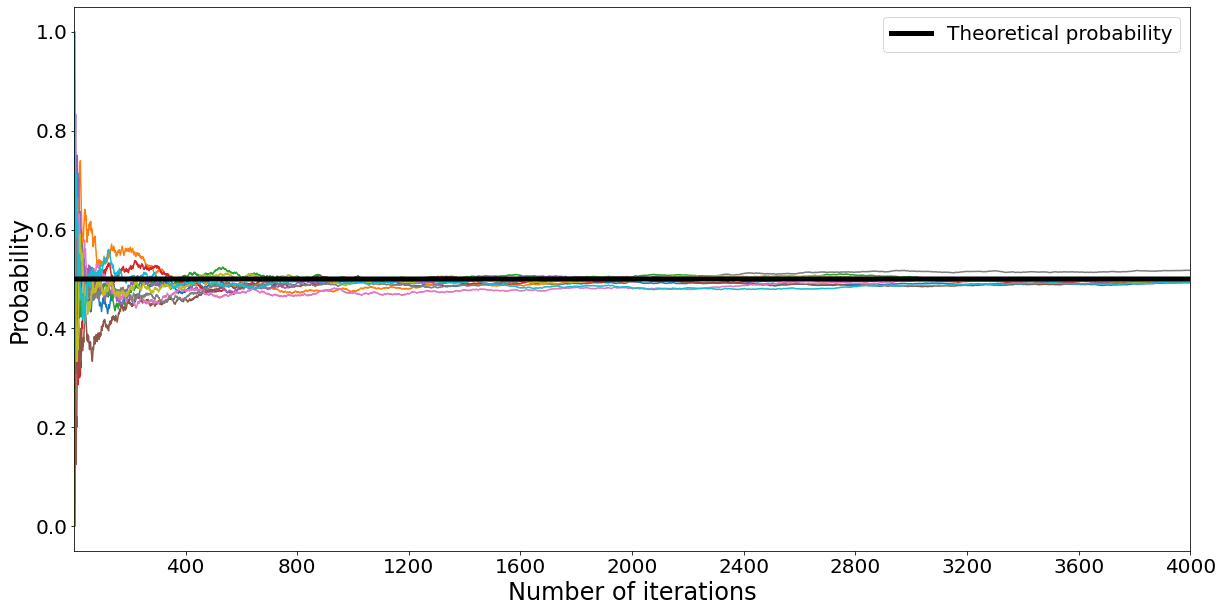

In [1]:
import matplotlib.pyplot as plt
import numpy as np
for simulations in range(0, 10):
    count = 0
    tosses = np.random.randint(2, size=4000)
    P_heads = []
    
    for i in range(1, 4001):
        index1 = [j for j in range(0, i) if tosses[j] == 1]
        P_heads.append(len(index1) / i)
        
    plt.xlabel('Number of iterations', fontsize=24)
    plt.ylabel('Probability', fontsize=24)
    plt.plot(np.arange(1, 4001), P_heads[0:4000])
    plt.gcf().set_size_inches(20, 10)
    plt.gca().set_xlim([1, 4000])
    plt.xticks(np.arange(400, 4001, 400), fontsize=20)
    plt.yticks(fontsize=20)
plt.plot(range(0, 4000), [1 / 2] * 4000, 'k', linewidth=5.0, label = 'Theoretical probability')
plt.legend(fontsize=20)
plt.show()

We observe that the empirical probabilities approach the theoretical probability as the number of iterations increases.

## 5.2 Die Rolls

We now consider two simple events that can occur when you roll a six-sided unbiased die. Let $A$ be the event of getting $2$ as the outcome of a die roll. Let $B$ be the event of getting an even number as the outcome. We calculate the probabilities of these two events theoretically and then verify our calculations by a simulation. Consider event $A$ first.

**Event A:** A die has $6$ faces. So, there are $6$ possible outcomes, of which we are interested in one. Therefore, $$P(A) = \frac{1}{6} = 0.1667$$

The next cell sumulates 10,000 die rolls and sketches the outcomes of these rolls in the first plot and the theoretical and empirical probabilities of $A$ in the second plot. Black dots indicate outcomes and red crosses indicate the occurrence of $A$. You can adjust the number of iterations $n$ using a slider located above the first plot.

In [10]:
import math
import ipywidgets as widgets

count = 0
Outcomes = 1 + np.random.randint(6, size = 10000)
P_A = []

for i in range(1, 10001):
    outcomes_trunc = Outcomes[0:i]
    index_A = [j for j in range(0, i) if outcomes_trunc[j] == 2]
    P_A.append(len(index_A) / i)

def probability_plot(n):
    outcomes_n = Outcomes[0:n]
    index_A_n = [z for z in index_A if z < n]
    
    s = [u'x'] * len(index_A_n)
    col = ['r'] * len(index_A_n)
    S = [320] * len(index_A_n)
    y = [2] * len(index_A_n)
    x = np.array(index_A_n) + np.array([1] * len(index_A_n))
    for _s, c, _x, _y, _S in zip(s, col, x, y, S):
        plt.scatter(_x, _y, marker=_s, c=c, s=_S)

    plt.plot(range(1, n + 1), outcomes_n, 'k.', markersize = 10.0)

    axes = plt.gca()
    fig = plt.gcf()
    fig.set_size_inches(20, 10)
    plt.xticks(fontsize = 18)
    plt.yticks(fontsize = 18)
    xint = []
    locs, labels = plt.xticks()
    for each in locs:
        xint.append(int(each))
    plt.xticks(xint)
    plt.xlabel('Number of Iterations', fontsize = 18)
    plt.ylabel('Outcomes', fontsize = 18)
    axes.set_xlim([0.5, n+0.5])
    axes.set_ylim([0, 7])
    plt.show()
    axes = plt.gca()
    fig = plt.gcf()
    fig.set_size_inches(20, 10)
    plt.plot(range(0, 10000), [1 / 6] * 10000, 'b', linewidth=5.0, label='Theoretical probability')
    axes.set_xlim([0, n + 1])
    plt.plot(np.arange(1, n + 1), P_A[0:n], 'k-', linewidth=3.0, label='Empirical probability')
    xint = []
    locs, labels = plt.xticks()
    for each in locs:
        xint.append(int(each))
    plt.xticks(xint, fontsize = 18)
    plt.yticks(fontsize=18)
    plt.xlabel('Number of Iterations', fontsize = 18)
    plt.ylabel('Probability', fontsize = 18)
    axes = plt.gca()
    fig = plt.gcf()
    fig.set_size_inches(20, 10)
    axes.set_xlim([1, n])
    axes.set_ylim([min(P_A), 1])
    plt.legend(fontsize = 20)
    plt.show()


widgets.interact(
    probability_plot,
    n=widgets.IntSlider(min=10, max=10000, value = 1000,
    continuous_update=False))

interactive(children=(IntSlider(value=1000, continuous_update=False, description='n', max=10000, min=10), Outp…

<function __main__.probability_plot(n)>

**Event B:** Out of the $6$ possible outcomes (namely $1$, $2,\ldots ,6$), only 3 are even numbers ($2$, $4$ and $6$). Therefore,
$$P(B)=3/6=\frac{1}{2}=0.5$$

The next cell sumulates 10,000 die rolls and sketches the outcomes of these rolls in the first plot and the theoretical and empirical probabilities of $B$ in the second plot. 

In [11]:
import ipywidgets as widgets

count = 0
Outcomes = 1 + np.random.randint(6, size = 10000)
P_B = []

for i in range(1, 10001):
    outcomes_trunc = Outcomes[0:i]
    index_B2 = [j for j in range(0, i) if outcomes_trunc[j] == 2]
    index_B4 = [j for j in range(0, i) if outcomes_trunc[j] == 4]
    index_B6 = [j for j in range(0, i) if outcomes_trunc[j] == 6]
    P_B.append((len(index_B2) + len(index_B4) + len(index_B6)) / i)

def probability_plot(n):
    outcomes_n = Outcomes[0:n]
    index_B2_n = [z for z in index_B2 if z < n]
    index_B4_n = [z for z in index_B4 if z < n]
    index_B6_n = [z for z in index_B6 if z < n]
    
    s = [u'x'] * len(index_B2_n)
    col = ['r'] * len(index_B2_n)
    S = [320] * len(index_B2_n)
    y = [2] * len(index_B2_n)
    x = np.array(index_B2_n) + np.array([1] * len(index_B2_n))
    for _s, c, _x, _y, _S in zip(s, col, x, y, S):
        plt.scatter(_x, _y, marker=_s, c=c, s=_S)
        
    s = [u'x'] * len(index_B4_n)
    col = ['r'] * len(index_B4_n)
    S = [320] * len(index_B4_n)
    y = [4] * len(index_B4_n)
    x = np.array(index_B4_n) + np.array([1] * len(index_B4_n))
    for _s, c, _x, _y, _S in zip(s, col, x, y, S):
        plt.scatter(_x, _y, marker=_s, c=c, s=_S)

    s = [u'x'] * len(index_B6_n)
    col = ['r'] * len(index_B6_n)
    S = [320] * len(index_B6_n)
    y = [6] * len(index_B6_n)
    x = np.array(index_B6_n) + np.array([1] * len(index_B6_n))
    for _s, c, _x, _y, _S in zip(s, col, x, y, S):
        plt.scatter(_x, _y, marker=_s, c=c, s=_S)
        
    plt.plot(range(1, n + 1), outcomes_n, 'k.', markersize = 10.0)

    axes = plt.gca()
    fig = plt.gcf()
    fig.set_size_inches(20, 10)
    axes.set_xlim([0.5, n+0.5])
    axes.set_ylim([0, 7])
    plt.xticks(fontsize = 18)
    plt.yticks(fontsize = 18)
    xint = []
    locs, labels = plt.xticks()
    for each in locs:
        xint.append(int(each))
    plt.xticks(xint)
    plt.xlabel('Number of Iterations', fontsize = 18)
    plt.ylabel('Outcomes', fontsize = 18)
    axes.set_xlim([0.5, n+0.5])
    axes.set_ylim([0, 7])
    plt.show()
    axes = plt.gca()
    fig = plt.gcf()
    fig.set_size_inches(20, 10)
    plt.plot(range(0, 10000), [1 / 2] * 10000, 'b', linewidth=5.0, label='Theoretical probability')
    axes.set_xlim([0, n + 1])
    plt.plot(np.arange(1, n + 1), P_B[0:n], 'k-', linewidth=3.0, label='Empirical probability')
    xint = []
    locs, labels = plt.xticks()
    for each in locs:
        xint.append(int(each))
    plt.xticks(xint, fontsize = 18)
    plt.yticks(fontsize=18)
    plt.xlabel('Number of Iterations', fontsize = 18)
    plt.ylabel('Probability', fontsize = 18)
    axes = plt.gca()
    fig = plt.gcf()
    fig.set_size_inches(20, 10)
    axes.set_xlim([1, n])
    axes.set_ylim([min(P_B), 1])
    plt.legend(fontsize = 20)
    plt.show()


widgets.interact(
    probability_plot,
    n=widgets.IntSlider(min=10, max=10000, value = 1000,
    continuous_update=False))

interactive(children=(IntSlider(value=1000, continuous_update=False, description='n', max=10000, min=10), Outp…

<function __main__.probability_plot(n)>

## 5.3 Events in Poker

Let us perform a few simple simulations to show the agreement between theoretical probability and empirical estimates as the number of samples grows. 

Recall that a standard card deck consists of $52$ cards, each marked with  one of four suits $♠, ♡, ♢,$ or $♣$ and one of $13$ ranks $1, 2, ..., 10, J, Q$, or $K$. Thus, there are $13$ cards per suit, and $4$ cards per rank. Furthermore, cards of $♡$ and $♢$ suits are colored red while $♠$ and $♣$ cards are colored black, and cards of ranks 'J', 'Q', and 'K' are called <i>face cards</i>. 

Consider the experiment where a card is picked at random from the deck. Let $R$ be the event that the card is red and let $F$ denote the event that it is a face card. For each of the events $R$, $F$ and $R\cup F$, 
we dtermine the theoretical probability, and then approximate it via simulations. 

In the following we determine the probability of each event and then approximate the probability by simulation. 

**Event $R$**: There are $2$ red suites, $♡$ and $♢$, each with $13$ cards, hence there are $26$ red cards, and $$P(R) = 26/52 = \frac{1}{2} = 0.5.$$

Following is a simulation of this event probability.

In [5]:
# Import the required function libraries
from itertools import product, combinations

In [6]:
# Define ranks, suits and cards
Ranks = {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 'J', 'Q', 'K'}
Suits = {'♢', '♠', '♣', '♡'}
Cards = list(product(Ranks, Suits))


 The empirical values of P(R) obtained after four simulations (consisting of 100,000 iterations each) are 0.499, 0.500, 0.498 and 0.501


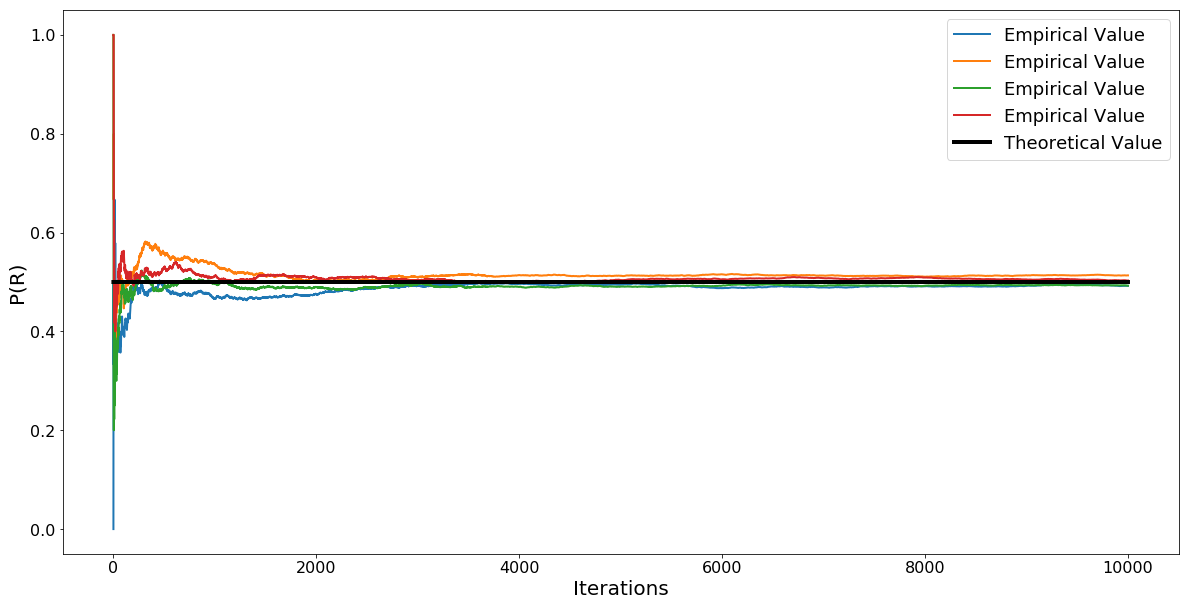

In [7]:
P_R_final = []
for simulations in range(1, 5):
    R_count = 0
    P_R = []
    for i in range(1, 100001):
        index = np.random.randint(0, 52)
        if Cards[index][1] == '♢' or Cards[index][1] == '♡':
            R_count = R_count + 1
        P_R.append(R_count/i)
    P_R_final.append(R_count/100000)
    plt.plot(range(1, 10001), P_R[0:10000], linewidth = 2.0, label = 'Empirical Value')
    plt.gcf().set_size_inches([20, 10])
    plt.xlabel('Iterations', fontsize = 20)
    plt.xticks(fontsize = 16)
    plt.ylabel('P(R)', fontsize = 20)
    plt.yticks(fontsize = 16)
print("\n The empirical values of P(R) obtained after four simulations (consisting of 100,000 iterations each) are %0.3f, %0.3f, %0.3f and %0.3f" 
      %(P_R_final[0], P_R_final[1], P_R_final[2], P_R_final[3]))
plt.plot(range(1, 10001), [0.5]*10000, 'k', linewidth = 4.0, label = 'Theoretical Value')
plt.legend(fontsize = 18)
plt.show()

**Face Card ($F$)**: There are $4$ suits, each with $3$ face cards, hence $4\times3=12$ face cards. Therefore,
$$P(F) = 12/52 = \frac{3}{13} = 0.231.$$
Here is a simulation of this probability.


 The empirical values of P(F) obtained after four simulations (consisting of 100,000 iterations each) are 0.232, 0.231, 0.232 and 0.230


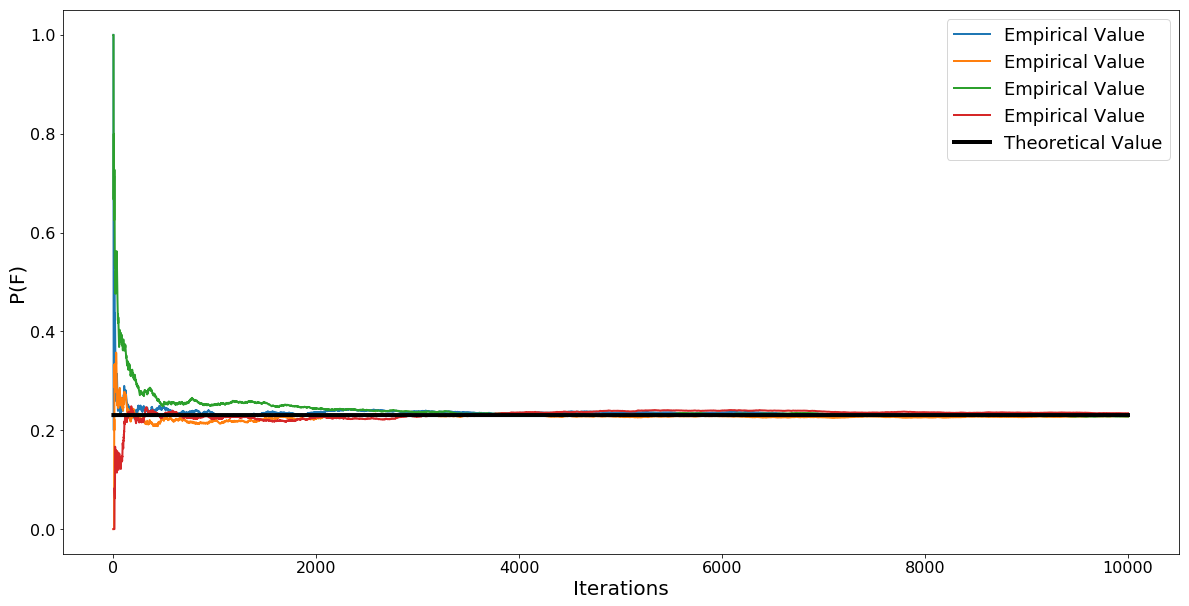

In [8]:
P_F_final = []
for simulations in range(1, 5):
    F_count = 0
    P_F = []
    for i in range(1, 100001):
        index = np.random.randint(0, 52)
        if Cards[index][0] in {'J', 'K', 'Q'}:
            F_count = F_count + 1
        P_F.append(F_count/i)
    P_F_final.append(F_count/100000)
    plt.plot(range(1, 10001), P_F[0:10000], linewidth = 2.0, label = 'Empirical Value')
    plt.gcf().set_size_inches([20, 10])
    plt.xlabel('Iterations', fontsize = 20)
    plt.xticks(fontsize = 16)
    plt.ylabel('P(F)', fontsize = 20)
    plt.yticks(fontsize = 16)
print("\n The empirical values of P(F) obtained after four simulations (consisting of 100,000 iterations each) are %0.3f, %0.3f, %0.3f and %0.3f" 
      %(P_F_final[0], P_F_final[1], P_F_final[2], P_F_final[3]))
plt.plot(range(1, 10001), [3/13]*10000, 'k', linewidth = 4.0, label = 'Theoretical Value')
plt.legend(fontsize = 18)
plt.show()

**Red or Face ($R\cup F$):** Let us first calculate the probability of the event $R\cap F$. There are two red suits, $♡$ and $♢$, and each has $3$ face cards, hence $|R\cap F|=6$. Therefore, 
$$P(R\cap F) = \frac6{52} = \frac{3}{26} = 0.115.$$
By inclusion-exclusion,
$$P(R\cup F) = P(R) + P(F) - P(R\cap F)
= 0.5 + 0. 231 - 0.115 = 0.615.$$
We can simulate the intersection and union probabilities as follows.


 The empirical values of the intersection probability obtained after four simulations (consisting of 100,000 iterations each) are 0.115, 0.117, 0.117 and 0.114


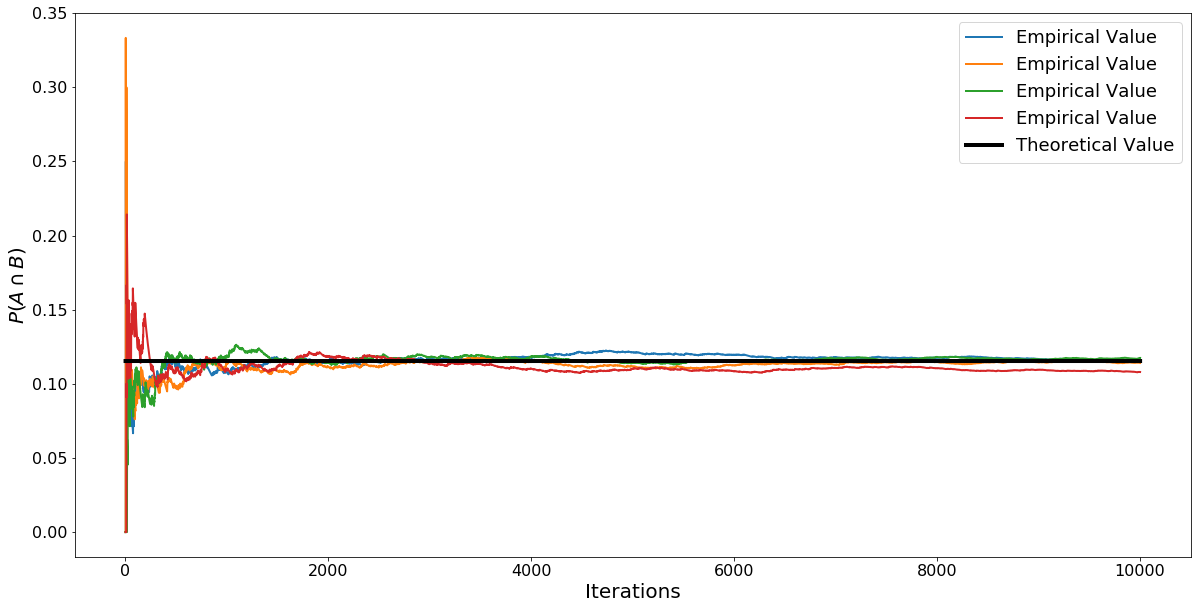

In [9]:
P_intersection_final = []
for simulations in range(1, 5):
    intersection_count = 0
    P_intersection = []
    for i in range(1, 100001):
        index = np.random.randint(0, 52)
        if (Cards[index][0] in {'J', 'K', 'Q'}) and (Cards[index][1] == '♢' or Cards[index][1] == '♡'):
            intersection_count = intersection_count + 1
        P_intersection.append(intersection_count/i)
    P_intersection_final.append(intersection_count/100000)
    plt.plot(range(1, 10001), P_intersection[0:10000], linewidth = 2.0, label = 'Empirical Value')
    plt.gcf().set_size_inches([20, 10])
    plt.xlabel('Iterations', fontsize = 20)
    plt.xticks(fontsize = 16)
    plt.ylabel('$P(A\cap B)$', fontsize = 20)
    plt.yticks(fontsize = 16)
print("\n The empirical values of the intersection probability obtained after four simulations (consisting of 100,000 iterations each) are %0.3f, %0.3f, %0.3f and %0.3f" 
      %(P_intersection_final[0], P_intersection_final[1], P_intersection_final[2], P_intersection_final[3]))
plt.plot(range(1, 10001), [3/26]*10000, 'k', linewidth = 4.0, label = 'Theoretical Value')
plt.legend(fontsize = 18)
plt.show()


 The empirical values of the union probability obtained after four simulations (consisting of 100,000 iterations each) are 0.615, 0.616, 0.615 and 0.617


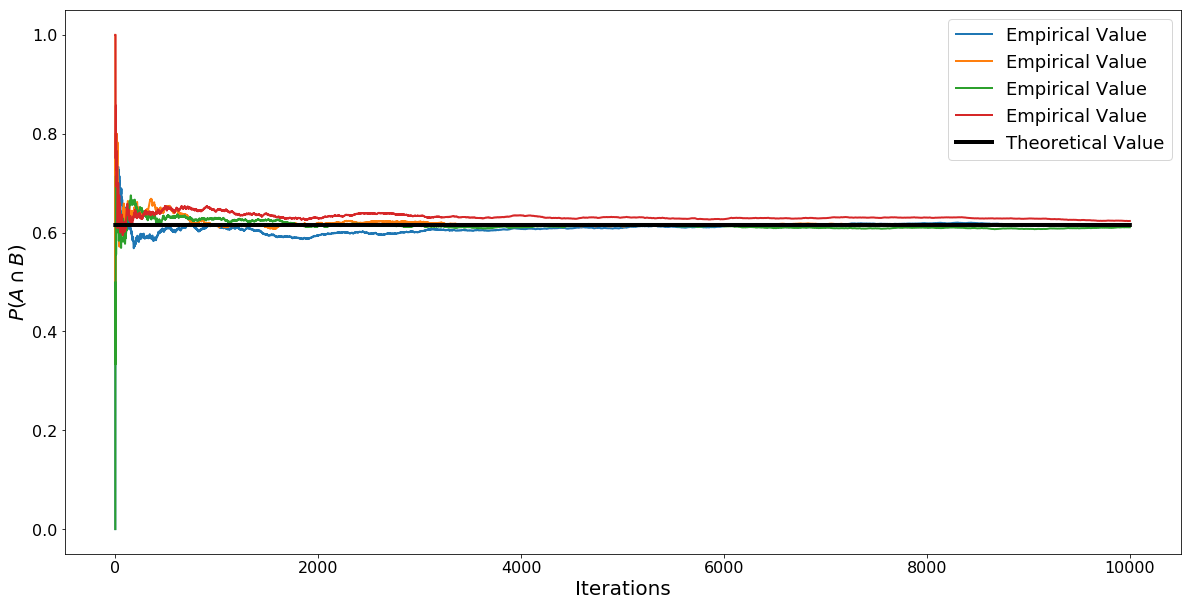

In [9]:
P_union_final = []
for simulations in range(1, 5):
    union_count = 0
    P_union = []
    for i in range(1, 100001):
        index = np.random.randint(0, 52)
        if (Cards[index][0] in {'J', 'K', 'Q'}) or (Cards[index][1] == '♢' or Cards[index][1] == '♡'):
            union_count = union_count + 1
        P_union.append(union_count/i)
    P_union_final.append(union_count/100000)
    plt.plot(range(1, 10001), P_union[0:10000], linewidth = 2.0, label = 'Empirical Value')
    plt.gcf().set_size_inches([20, 10])
    plt.xlabel('Iterations', fontsize = 20)
    plt.xticks(fontsize = 16)
    plt.ylabel('$P(A\cap B)$', fontsize = 20)
    plt.yticks(fontsize = 16)
print("\n The empirical values of the union probability obtained after four simulations (consisting of 100,000 iterations each) are %0.3f, %0.3f, %0.3f and %0.3f" 
      %(P_union_final[0], P_union_final[1], P_union_final[2], P_union_final[3]))
plt.plot(range(1, 10001), [1/2 + 3/13 - 3/26]*10000, 'k', linewidth = 4.0, label = 'Theoretical Value')
plt.legend(fontsize = 18)
plt.show()

We conclude that for both the events, the empirical probabilities approach the theoretical probabilities as $n$ increases. Our calculations thus stand verified.

## 5.4 The Birthday Paradox

In a group of 5 people, how likely is it that everyone has a unique birthday (assuming that nobody was born on February 29th of a leap year)? You may feel it is highly likely because there are $365$ days in a year and loosely speaking, $365$ is "much greater" than $5$. Indeed, as you shall see, this probability is greater than $0.9$. However, in a group of $25$ or more, what is the probability that no two persons have the same birthday? You might be surprised to know that the answer is less than a half. This is known as the "birthday paradox".

In general, for a group of $n$ people, the probability that no two persons share the same birthday can be calculated as:

\begin{align*}
P &= \frac{\text{Number of } n \text{-permutations of birthdays}}{\text{Total number of birthday assignments allowing repeated birthdays}}\\
&= \frac{365!/(365-n)!}{365^n}\\
&= \prod_{k=1}^n \frac{365-k+1}{365}
\end{align*}

Observe that this value decreases with $n$. At $n=23$, this value goes below half. The following cell simulates this event and compares the associated empirical and theoretical probabilities. You can use the slider called "iterations" to vary the number of iterations performed by the code.

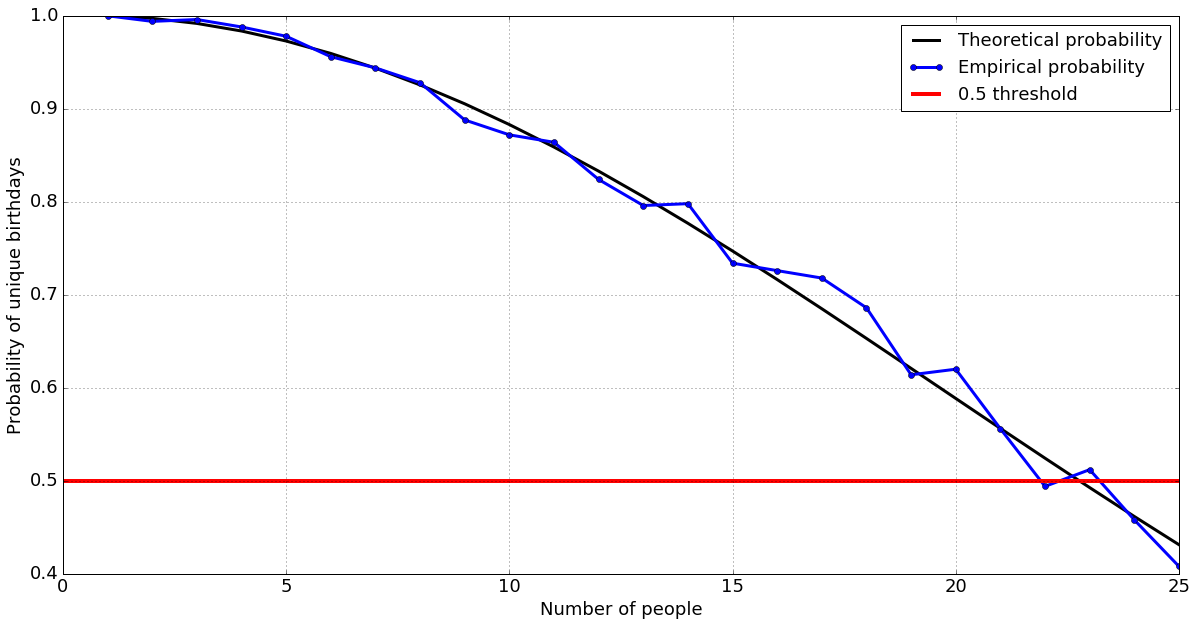

In [4]:
# Code modified by Alex Chew
import itertools
import random

import matplotlib.pyplot as plt
import numpy as np

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


# Range of number of people
PEOPLE = np.arange(1, 26)

# Days in year
DAYS = 365


def prob_unique_birthdays(num_people):
    '''
    Returns the probability that all birthdays are unique, among a given
    number of people with uniformly-distributed birthdays.
    '''
    return (np.arange(DAYS, DAYS - num_people, -1) / DAYS).prod()


def sample_unique_birthdays(num_people):
    '''
    Selects a sample of people with uniformly-distributed birthdays, and
    returns True if all birthdays are unique (or False otherwise).
    '''
    bdays = np.random.randint(0, DAYS, size=num_people)
    unique_bdays = np.unique(bdays)
    return len(bdays) == len(unique_bdays)


def plot_probs(iterations):
    '''
    Plots a comparison of the probability of a group of people all having
    unique birthdays, between the theoretical and empirical probabilities.
    '''
    sample_prob = []  # Empirical prob. of unique-birthday sample 
    prob = []         # Theoretical prob. of unique-birthday sample
    
    # Compute data points to plot
    np.random.seed(1)
    for num_people in PEOPLE:
        unique_count = sum(sample_unique_birthdays(num_people)
                          for i in range(iterations))
        sample_prob.append(unique_count / iterations)
        prob.append(prob_unique_birthdays(num_people))
    
    # Plot results
    plt.plot(PEOPLE, prob, 'k-', linewidth = 3.0, label='Theoretical probability')
    plt.plot(PEOPLE, sample_prob, 'bo-', linewidth = 3.0, label='Empirical probability')
    plt.gcf().set_size_inches(20, 10)
    plt.axhline(0.5, color='red', linewidth = 4.0, label='0.5 threshold')
    plt.xlabel('Number of people', fontsize = 18)
    plt.ylabel('Probability of unique birthdays', fontsize = 18)
    plt.grid()
    plt.xticks(fontsize = 18)
    plt.yticks(fontsize = 18)
    plt.legend(fontsize = 18)
    plt.show()

    
interact(plot_probs,
         iterations=widgets.IntSlider(min=50, value = 500, max=5050, step=200),
         continuous_update=False, layout='bottom');